In [77]:
import importlib
import utils
import plot_utils
import pandas as pd
import matplotlib.pyplot as plt
import constants
import numpy as np

importlib.reload(utils)
importlib.reload(plot_utils)
importlib.reload(constants)


<module 'constants' from 'C:\\Users\\jaimo\\Documents\\GitHub\\visualizing-infrastructure-unfairness\\scripts\\constants.py'>

In [24]:
state_name = 'California'


C:\Users\jaimo\Documents\GitHub\visualizing-infrastructure-unfairness\scripts\utils.py:329: DtypeWarning: Columns (27,35) have mixed types. Specify dtype option on import or set low_memory=False.
  if county_name is not None:


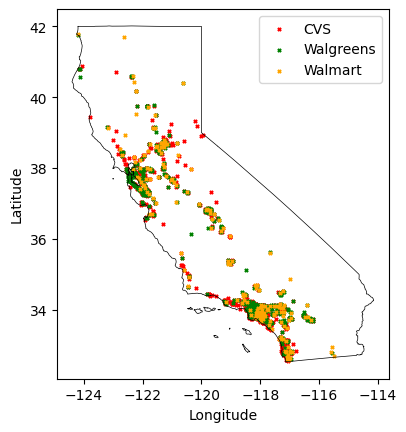

<Figure size 640x480 with 0 Axes>

In [25]:
plot_utils.plot_state_map(state_name)
plot_utils.plot_pharmacies(state_name, which='top3')
plt.show()
plt.clf()


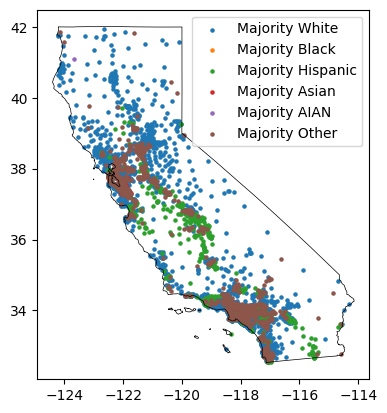

In [52]:
df = utils.get_dataframe(state_name)
races = ['White', 'Black', 'Hispanic', 'Asian', 'AIAN', 'NHPI', 'Other']
all_tracts = {race: [] for race in races}
n = len(df)
for j in range(n):
    if df.iloc[j].pct_NH_Blk_alone_ACS_10_14 >= 50:
        all_tracts['Black'].append(j)
    elif df.iloc[j].pct_NH_White_alone_ACS_10_14 >= 50:
        all_tracts['White'].append(j)
    elif df.iloc[j].pct_Hispanic_ACS_10_14 >= 50:
        all_tracts['Hispanic'].append(j)
    elif df.iloc[j].pct_NH_Asian_alone_ACS_10_14 >= 50:
        all_tracts['Asian'].append(j)
    elif df.iloc[j].pct_NH_AIAN_alone_ACS_10_14 >= 50:
        all_tracts['AIAN'].append(j)
    elif df.iloc[j].pct_NH_NHOPI_alone_ACS_10_14 >= 50:
        all_tracts['NHPI'].append(j)
    else:
        all_tracts['Other'].append(j)
        
plot_utils.plot_state_map(state_name)
        
for race in races:
    if len(all_tracts[race]) > 0:
        longitudes_group = [df.iloc[j].Longitude for j in all_tracts[race]]
        latitudes_group = [df.iloc[j].Latitude for j in all_tracts[race]]
        plt.scatter(longitudes_group, latitudes_group, marker='o', s=5, label='Majority ' + race)
    
plt.legend()


In [71]:
def get_medical_deserts(state_name, n_miles, poverty_threshold=30):
    dataframe = utils.get_dataframe(state_name)
    n = len(dataframe)
    print(n)
    
    latitudes = dataframe['Latitude'].values
    longitudes = dataframe['Longitude'].values
    
    medical_deserts = []
    medical_deserts_by_race = {race: [] for race in races}
    
    k, cvs_pharmacies, walgreens_pharmacies, walmart_pharmacies = utils.get_pharmacy_coordinates(state_name, which='top3')
    pharmacy_coordinates = cvs_pharmacies + walgreens_pharmacies + walmart_pharmacies
    
    for j in range(n):
        # print(j) if j % 10 == 0 else None
        minimum_distance = np.inf
        for i in range(k):
            pharmacy_latitude = pharmacy_coordinates[i][0]
            pharmacy_longitude = pharmacy_coordinates[i][1]
            distance = utils.distance_from_coordinates_2(latitudes[j], longitudes[j], pharmacy_latitude, pharmacy_longitude)
            if distance < minimum_distance:
                minimum_distance = utils.distance_from_coordinates(dataframe.iloc[j].Latitude, dataframe.iloc[j].Longitude, pharmacy_coordinates[i][0], pharmacy_coordinates[i][1])
           
        if minimum_distance > n_miles * constants.miles_to_km and dataframe.iloc[j].pct_Prs_Blw_Pov_Lev_ACS_10_14 >= poverty_threshold:
            medical_deserts.append([longitudes[j], latitudes[j]])
            if df.iloc[j].pct_NH_Blk_alone_ACS_10_14 >= 50:
                medical_deserts_by_race['Black'].append([longitudes[j], latitudes[j]])
            elif df.iloc[j].pct_NH_White_alone_ACS_10_14 >= 50:
                medical_deserts_by_race['White'].append([longitudes[j], latitudes[j]])
            elif df.iloc[j].pct_Hispanic_ACS_10_14 >= 50:
                medical_deserts_by_race['Hispanic'].append([longitudes[j], latitudes[j]])
            elif df.iloc[j].pct_NH_Asian_alone_ACS_10_14 >= 50:
                medical_deserts_by_race['Asian'].append([longitudes[j], latitudes[j]])
            elif df.iloc[j].pct_NH_AIAN_alone_ACS_10_14 >= 50:
                medical_deserts_by_race['AIAN'].append([longitudes[j], latitudes[j]])
            elif df.iloc[j].pct_NH_NHOPI_alone_ACS_10_14 >= 50:
                medical_deserts_by_race['NHPI'].append([longitudes[j], latitudes[j]])
            else:
                medical_deserts_by_race['Other'].append([longitudes[j], latitudes[j]])
                
    return medical_deserts, medical_deserts_by_race

In [72]:
medical_deserts, medical_deserts_by_race = get_medical_deserts(state_name, 5, 30)

7968


C:\Users\jaimo\Documents\GitHub\visualizing-infrastructure-unfairness\scripts\utils.py:348: DtypeWarning: Columns (27,35) have mixed types. Specify dtype option on import or set low_memory=False.
  walgreens_pharmacies = pharmacies_data[pharmacies_data['Pharmacy_Name'].str.contains('WALGREENS')]


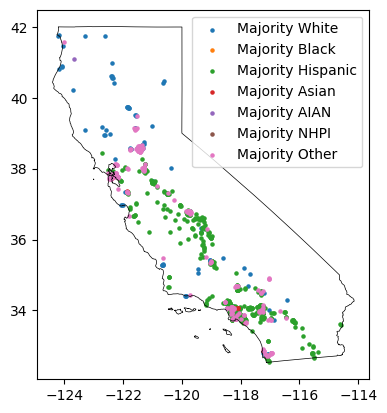

In [78]:
for race in races:
    plt.scatter([x[0] for x in medical_deserts_by_race[race]], [x[1] for x in medical_deserts_by_race[race]], marker='o', s=5, label='Majority ' + race)

plt.legend()

plot_utils.plot_state_map(state_name)

In [79]:
print(len(medical_deserts))

1142


In [81]:
for race in races:
    print(race, len(medical_deserts_by_race[race]))

White 106
Black 15
Hispanic 778
Asian 18
AIAN 1
NHPI 0
Other 224
